# Compare Images MSE and Structual Similarity

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [5]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH_1 = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH_1   

'../../res/img/chinese_art/Dataset/Zou_Chuan_An/Zou_Chuan_An_06.jpg'

In [6]:
IMG_PATH_2 = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH_2   

'../../res/img/Lions/509b768aa44dd931.jpg'

---
### Loading data

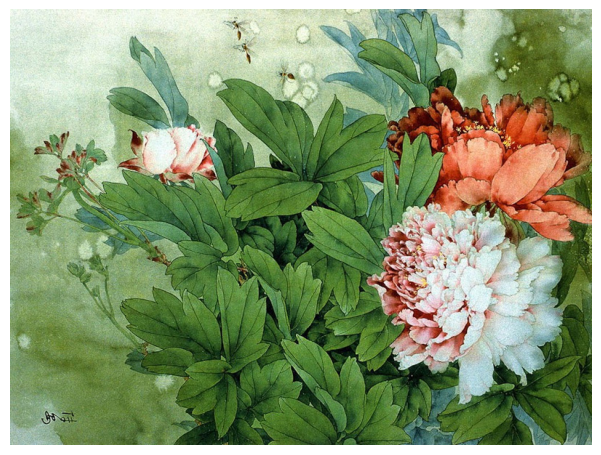

(600, 800, 3)

In [8]:
img = cv2.imread(IMG_PATH_1)
imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

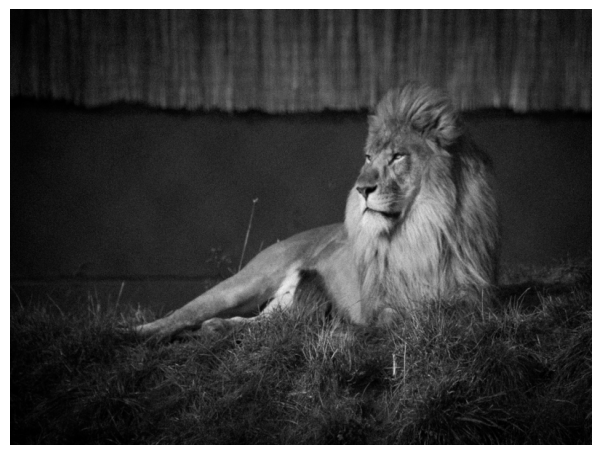

(600, 800, 3)

In [17]:
img_2 = cv2.imread(IMG_PATH_2)
img_2 = cv2.resize(img_2, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA)
imshow(img_2)

gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

img_2.shape

---
### Compare with Mean Squared Error (MSE) and Structural Similarity

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [30]:
from skimage.metrics import structural_similarity

def mse(img_1, img_2):
    error = np.sum( (img_1.astype("float") - img_2.astype("float"))**2 )
    error /= float(img_1.shape[0] * img_1.shape[1])
    return error

def compare(img_1, img_2, text="Comparison"):
    img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    print(f"\n{'#'*16}\n{text}")
    print(f"MSE = {mse(img_1, img_2):0.2f}")
    print(f"Structural Similarity = {structural_similarity(img_1, img_2):0.2f}")

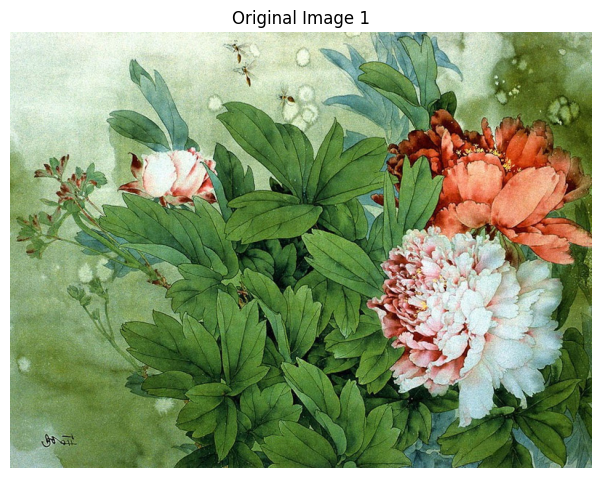

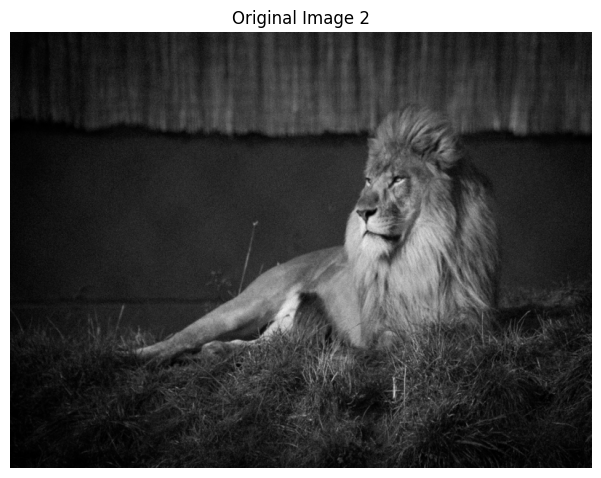

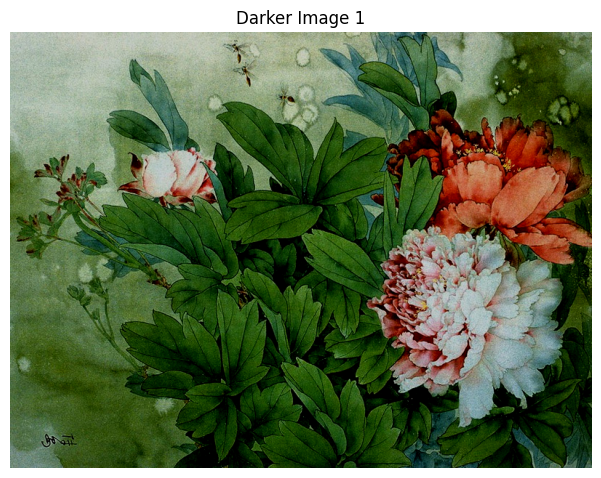


################
Flower Image and Lion Image
MSE = 12214.53
Structural Similarity = 0.10

################
Flower Image and darker Flower Image
MSE = 2337.03
Structural Similarity = 0.82

################
Lion Image and darker Flower Image
MSE = 6061.22
Structural Similarity = 0.13


In [32]:
imshow(img, "Original Image 1")
imshow(img_2, "Original Image 2")

M = np.full(img.shape, 50, dtype="uint8")
img_3 = cv2.subtract(img, M)
imshow(img_3, "Darker Image 1")

compare(img, img_2, "Flower Image and Lion Image")
compare(img, img_3, "Flower Image and darker Flower Image")
compare(img_2, img_3, "Lion Image and darker Flower Image")

---